In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

import pandas as pd
from matplotlib.ticker import LogFormatter 
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
from matplotlib import ticker, cm
import pickle

#%matplotlib notebook

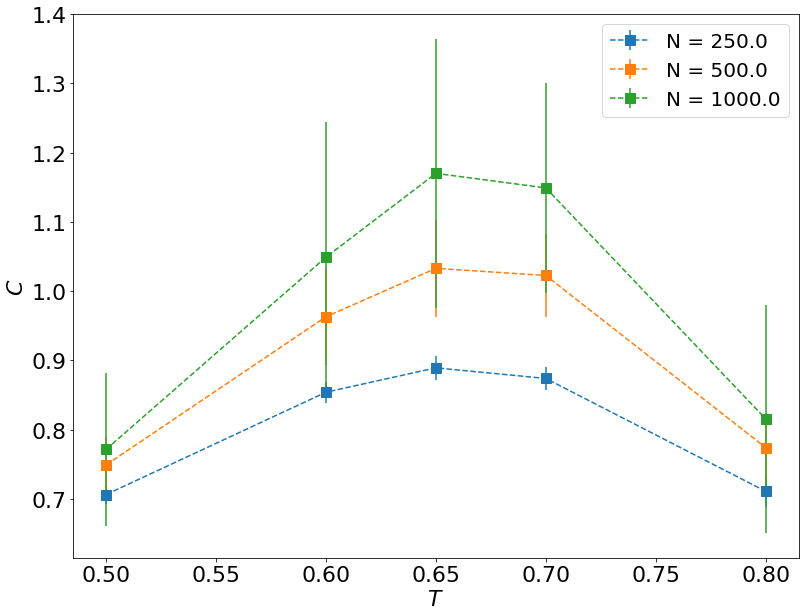

In [22]:
data_np = np.loadtxt("Homopolymer_simulations/hcap.conformations.dat", skiprows=1)


lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)
 
for l in lengths:
    data_l = data_np[data_np[:,0]==l]
 
    J_l = data_l[:,1]
    
    heat = data_l[:,4]  
 
    errs = data_l[:,5]

    #plt.plot(x*np.power(L, 1/nu), y, "s--", ms = 10, label = "N = " + str(l))
    plt.errorbar(J_l, heat, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$T$', fontsize = 22)
plt.ylabel(r"$ C  $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.xlim(0.58)
 

plt.legend(loc="best", fontsize=20)
 

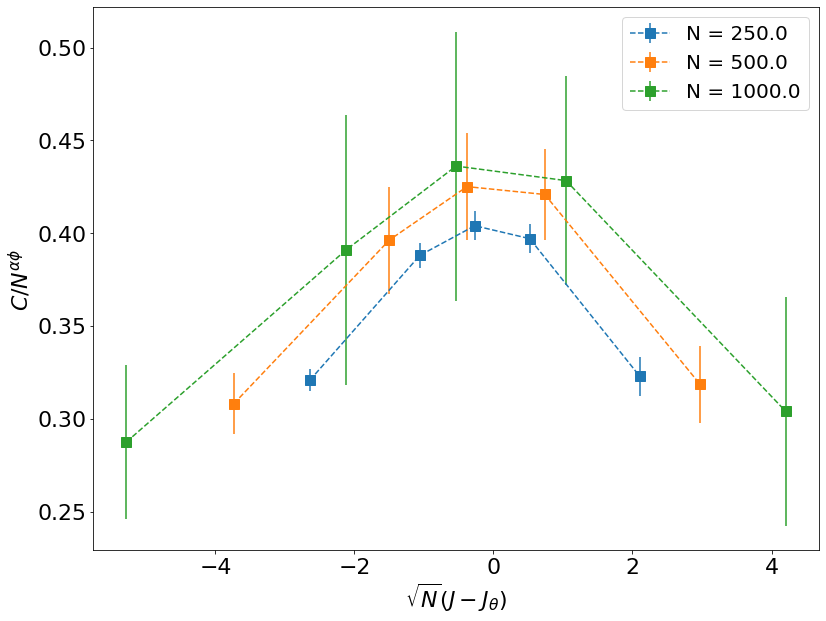

In [29]:
data_np = np.loadtxt("Homopolymer_simulations/hcap.conformations.dat", skiprows=1)

Jc = 0.667
 
    
#из книги про блуждания 
alpha = 1/3 
fc = 3/7#0.48

alpha_fc = alpha*fc

lengths = np.unique(data_np[:, 0])

fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)
 
for l in lengths:
 

    L = l
    data_l = data_np[data_np[:,0]==l]
 
    J_l = data_l[:,1]
    
    heat = data_l[:,4] #*J_l*J_l
 
    errs = data_l[:,5] #*J_l*J_l 

    x = J_l-Jc

    
    y = heat/np.power(L, alpha_fc)
    
    errs = errs/np.power(L, alpha_fc)
        
    #использую корень на оси OX
    plt.errorbar(x*np.sqrt(L), y, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)
 
 
plt.xlabel(r'$ \sqrt{N} (J-J_{\theta}) $', fontsize = 22)
plt.ylabel(r"$ C / N ^{ \alpha \phi}$ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
 

plt.legend(loc="best", fontsize=20)
 

### Из Беретти-Сокаля 


Ошибок нет, так как это файлы распределений 

Text(0.5, 1.0, ' ')

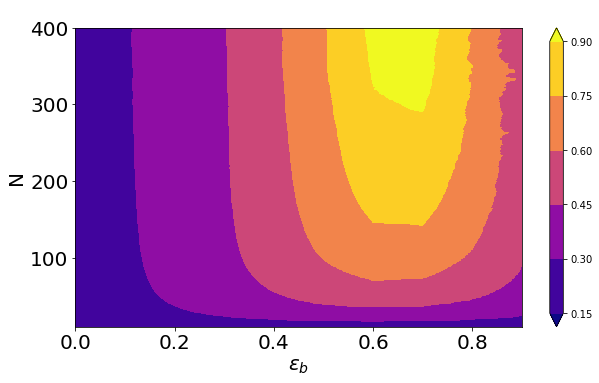

In [30]:
nmin = 10
nmax = 400

data = np.zeros(( nmax-nmin+1, 10, 11 ))

 
for i in range(10):
    filename = "Homopolymer_simulations/Main_simulations/counts_isaw_moresteps_"+str(i/10)+"00000_higher_hpc.txt"
    #currentdata = np.genfromtxt(file, max_rows = 6, missing_values = "" )
    filedata = np.loadtxt(filename, skiprows=9) 
    for N in range(nmin, nmax+1):
        currentdata=filedata[filedata[:,0]==N] 
        #currentdata[:,1]= currentdata[:,1]/(N+1)  
        
 
        data[N-nmin, i, 0] = np.sum(currentdata[:,1]/(N+1)*currentdata[:,2])/np.sum(currentdata[:,2])
 
        data[N-nmin, i, 2] = np.sum(currentdata[:,1]*currentdata[:,1]*currentdata[:,2]/(N+1)/(N+1))/np.sum(currentdata[:,2])
    
        data[N-nmin, i, 4] = np.sum((currentdata[:,1]/(N+1))**4*currentdata[:,2])/np.sum(currentdata[:,2])
 
        data[N-nmin, i, 6] = 1.0 - data[N-nmin, i, 2]/3.0/data[N-nmin, i, 0]/data[N-nmin, i, 0]
 
        data[N-nmin, i, 8] = 1.0 - data[N-nmin, i, 4]/3.0/data[N-nmin, i, 2]/data[N-nmin, i, 2]
 
        meanm =  np.sum(currentdata[:,1]*currentdata[:,2])/np.sum(currentdata[:,2])
        meanmsq =  np.sum(currentdata[:,1]*currentdata[:,1]*currentdata[:,2])/np.sum(currentdata[:,2])
        #data[N-nmin, i-21, 10] = (100+i)/100.0*(100+i)/100.0 * (meanmsq - meanm*meanm)
 
      
        j = i/10
        data[N-nmin, i, 10] = (meanmsq - meanm*meanm)/N 
        
#heat capacity 

x = np.arange(nmin, nmax+1)
y = np.arange(0, 10)/10.0
X, Y = np.meshgrid(x, y)


plt.figure(figsize=(10,5.5))
plt.contourf(y, x,  data[:,:,10] ,extend='both', cmap = "plasma")
plt.xlabel(r"$\epsilon_b$", fontsize=20)
plt.ylabel("N", fontsize=20)
plt.tick_params(axis='x', labelsize=20) 
plt.tick_params(axis='y', labelsize=20) 
plt.colorbar()
plt.title(' ', fontsize=20)

In [31]:
lengths = [50, 75, 95,100, 125, 150, 200, 250, 300, 350  ]
#lengths = np.array([200, 205, 210, 215, 220]) + 30

#lengths = np.arange(250, 260)-5

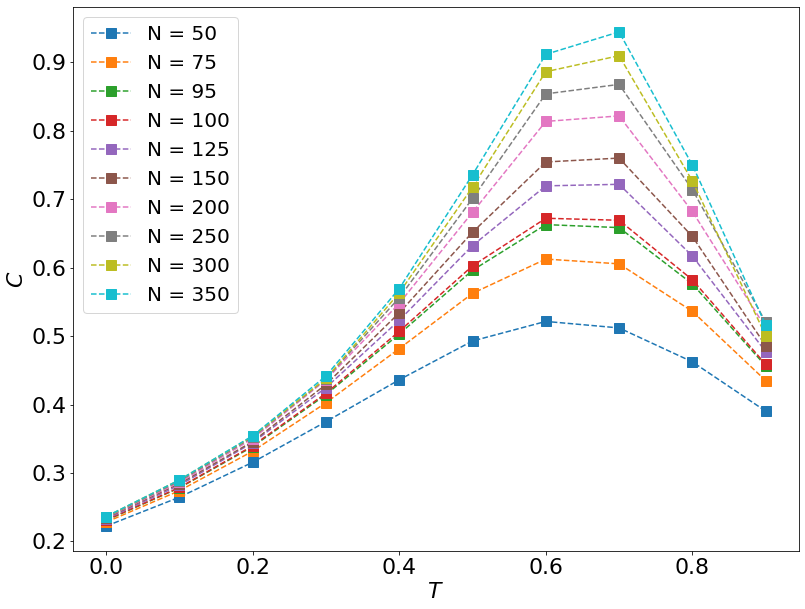

In [32]:
 
J_l = y
 
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)
 
for l in lengths:

    heat = data[l-nmin,:,10] 
 
     
    plt.plot(J_l, heat, "s--", ms = 10, label = "N = " + str(l))
 
plt.xlabel(r'$T$', fontsize = 22)
plt.ylabel(r"$ C  $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.xlim(-20, 20)

#plt.axvline(x=0, c="k" )

plt.legend(loc="best", fontsize=20)
 

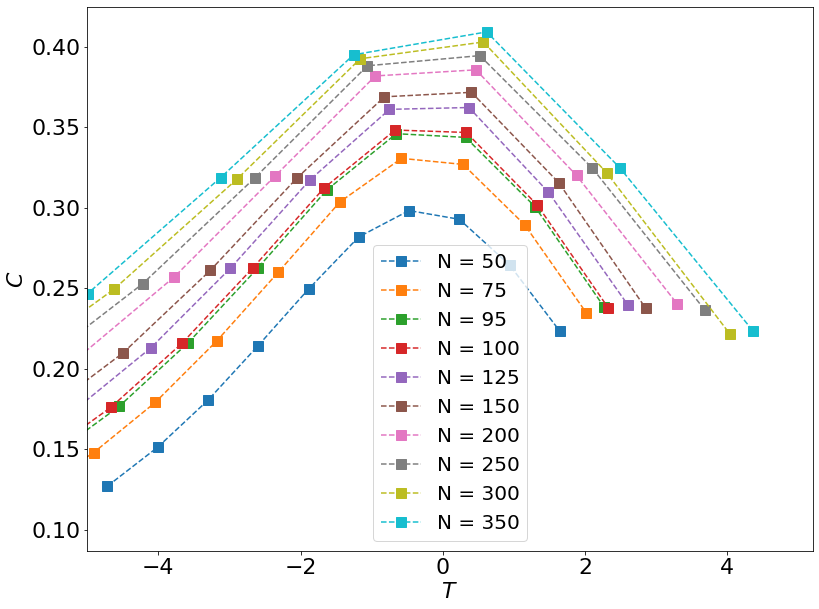

In [33]:
 
J_l = y
 
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

Jc = 0.667
 
    
#из книги про блуждания 
alpha = 1/3 
fc = 3/7
alpha_fc = alpha*fc



for l in lengths:

    L = l
    
    heat = data[l-nmin,:,10] 

    y = heat/np.power(L, alpha_fc)
    
    x = J_l-Jc 
 
     
    #снова корень 
    plt.plot(x*np.power(L,1/2), y, "s--", ms = 10, label = "N = " + str(l))
 
plt.xlabel(r'$T$', fontsize = 22)
plt.ylabel(r"$ C  $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.xlim(-5)

#plt.axvline(x=0, c="k" )

plt.legend(loc="best", fontsize=20)
